# **AI-based Resume Screening System**

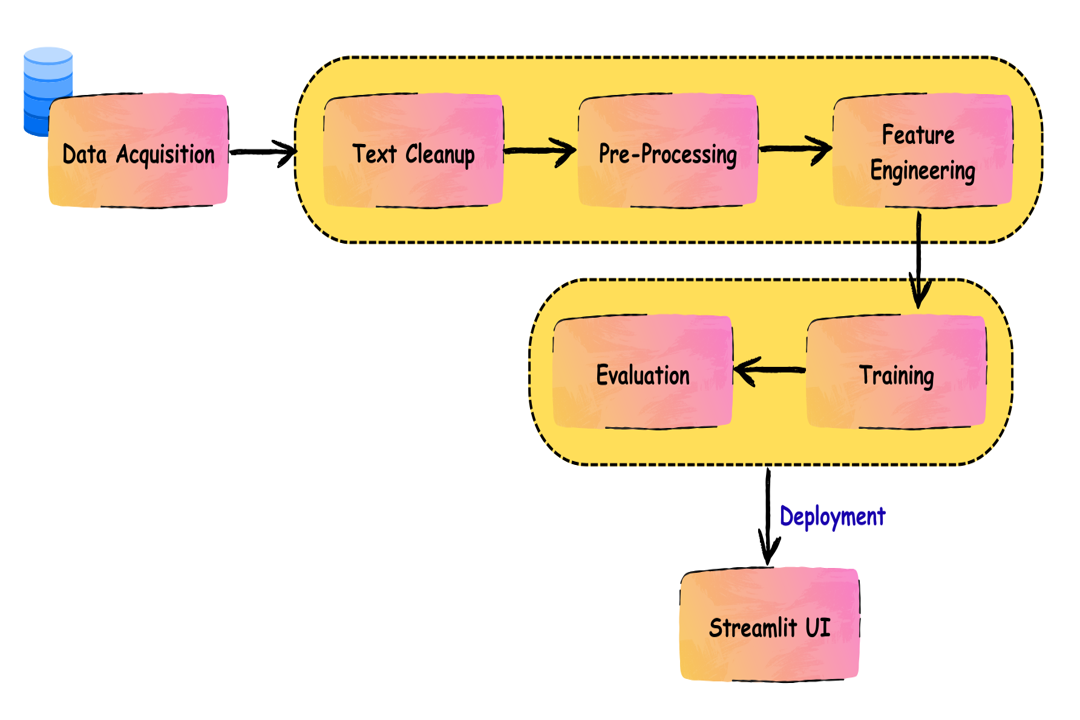

In [21]:
from PIL import Image
from IPython.display import display

img = Image.open('Flow diagram.png')
img = img.resize((1080, 720))
display(img)

In [23]:
# Necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import string
import re
from wordcloud import WordCloud
import streamlit as st
import en_core_web_sm
import joblib

import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv('C:/Users/bikas/Desktop/Zaalima internship/Project 2/Dataset/resume.csv')
df.head()

resume_id                                        resume_text  \
0          1  Name: Jill Johnson\nEmail: harrisjason@example...   
1          2  Name: Chelsea Lee\nEmail: jessicalamb@example....   
2          3  Name: Bradley Anderson\nEmail: lawrencemiller@...   
3          4  Name: John Cowan\nEmail: kimrobinson@example.c...   
4          5  Name:\nBecky Johnson\nEmail:\nhunterscott@exam...   

                category  
0  Cybersecurity Analyst  
1         Data Scientist  
2           Data Analyst  
3        Product Manager  
4      Software Engineer

**Exploratory Data Analysis (EDA)**

In [25]:
print(f"Dataset shape: {df.shape}")
print("\nCategory distribution:")
print(df['category'].value_counts())

Dataset shape: (2000, 3)

Category distribution:
category
Financial Analyst        212
Software Engineer        211
HR Specialist            208
DevOps Engineer          207
Marketing Manager        206
Data Analyst             203
Product Manager          199
Cybersecurity Analyst    196
Data Scientist           185
UX Designer              173
Name: count, dtype: int64


In [ ]:
print("Null values per column:\n", df.isnull().sum())

empty_resumes = df['resume_text'].str.strip().eq('').sum()
print(f"Empty resume entries: {empty_resumes}")

Null values per column:
 resume_id      0
resume_text    0
category       0
dtype: int64
Empty resume entries: 0


In [28]:
duplicates = df.duplicated(subset='resume_text').sum()
print(f"Number of duplicate resumes: {duplicates}")

Number of duplicate resumes: 0


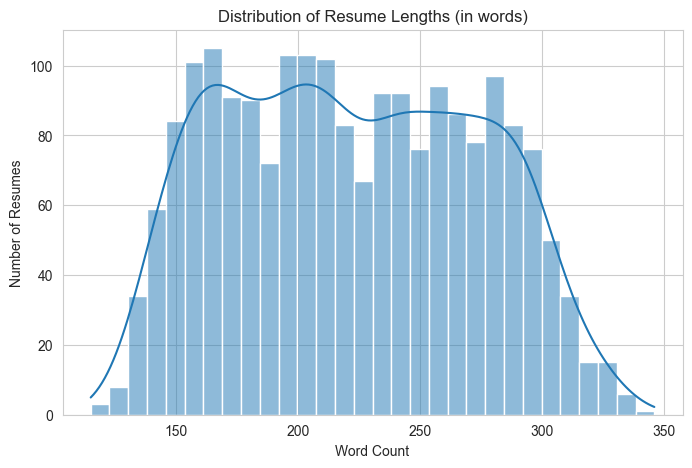

In [27]:
df['text_length'] = df['resume_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Distribution of Resume Lengths (in words)")
plt.xlabel("Word Count")
plt.ylabel("Number of Resumes")
plt.show()

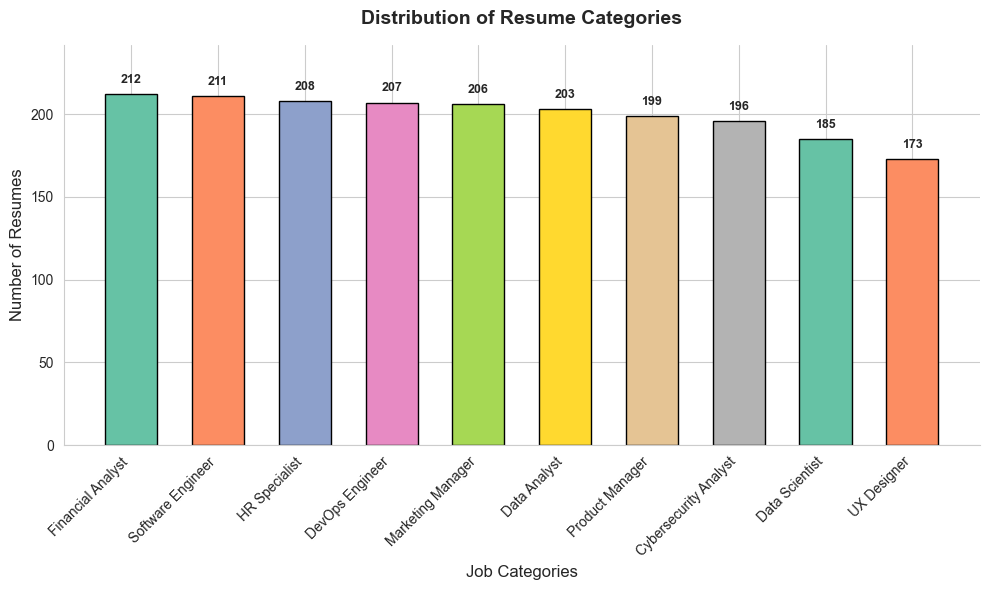

In [6]:
# Category distribution

sns.set_style("whitegrid")

category_counts = df['category'].value_counts()

colors = sns.color_palette("Set2", len(category_counts))

plt.figure(figsize=(10, 6))
bars = plt.bar(category_counts.index, category_counts.values,
               color=colors, edgecolor='black', width=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5,
             f'{yval}', ha='center', va='bottom', fontsize=9, fontweight='semibold')

plt.title('Distribution of Resume Categories', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Job Categories', fontsize=12)
plt.ylabel('Number of Resumes', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, max(category_counts.values) + 30)

for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

In [29]:
from collections import Counter
all_words = ' '.join(df['resume_text']).split()
word_freq = Counter(all_words)
print("Top 10 common words before preprocessing:")
print(word_freq.most_common(10))

Top 10 common words before preprocessing:
[('-', 50212), ('•', 17457), ('|', 7009), ('in', 6817), ('to', 5561), ('by', 5470), ('Management', 5420), ('and', 4606), ('Optimized', 3721), ('Analyzed', 3678)]


**Data Preprocessing and Feature Extraction**

In [7]:
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    text = text.lower()
    
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    text = re.sub(r'\S+@\S+', '', text)
    
    text = re.sub(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]', '', text)
    
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    
    return ' '.join(tokens)

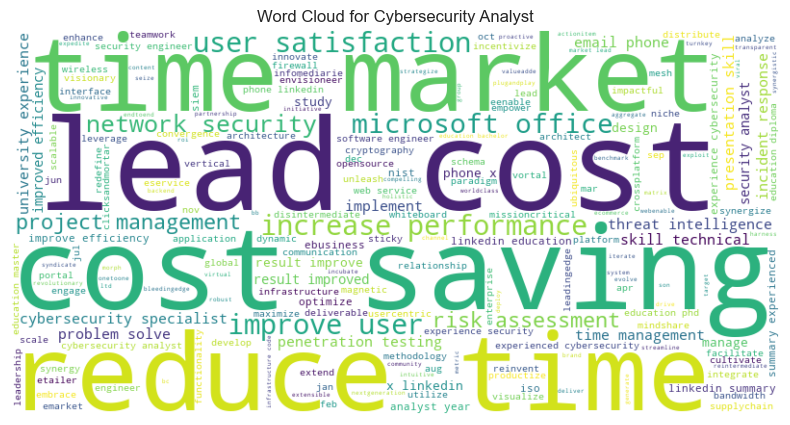

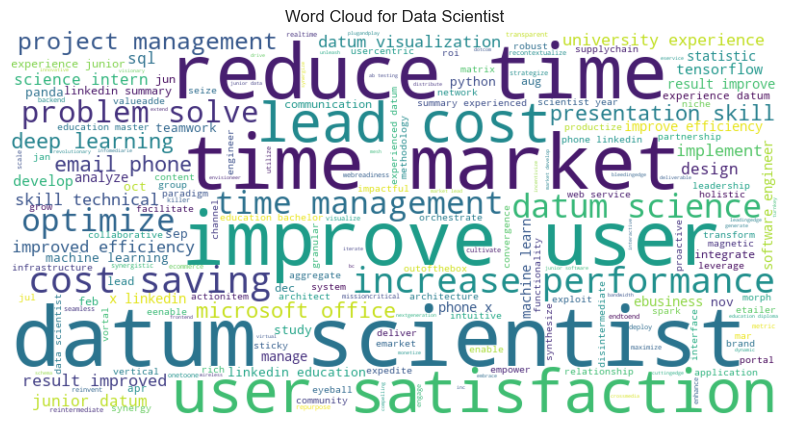

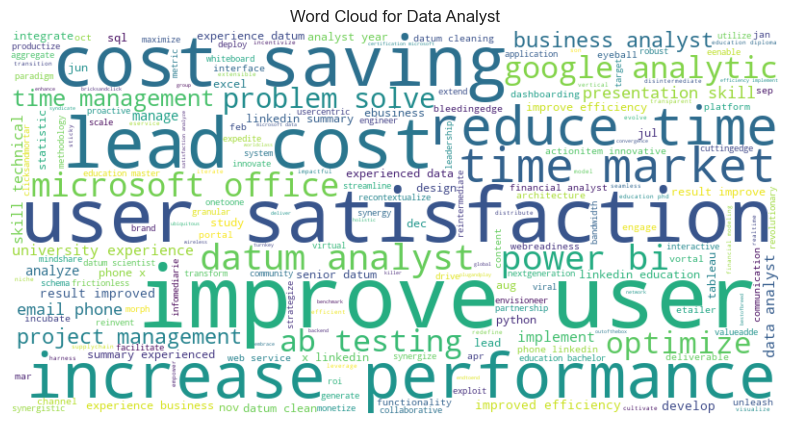

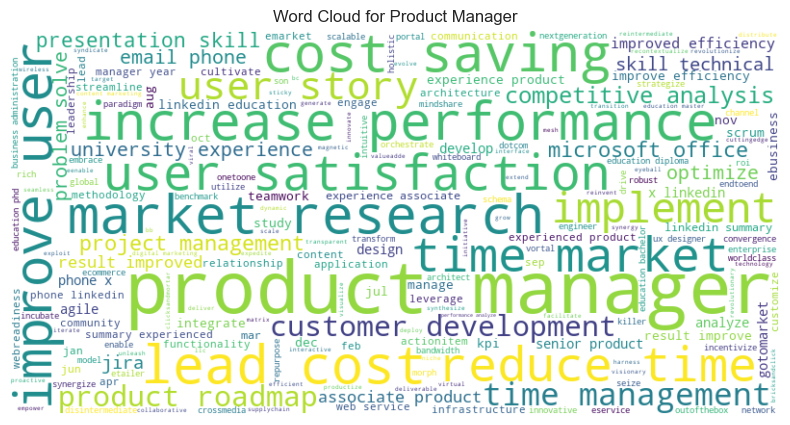

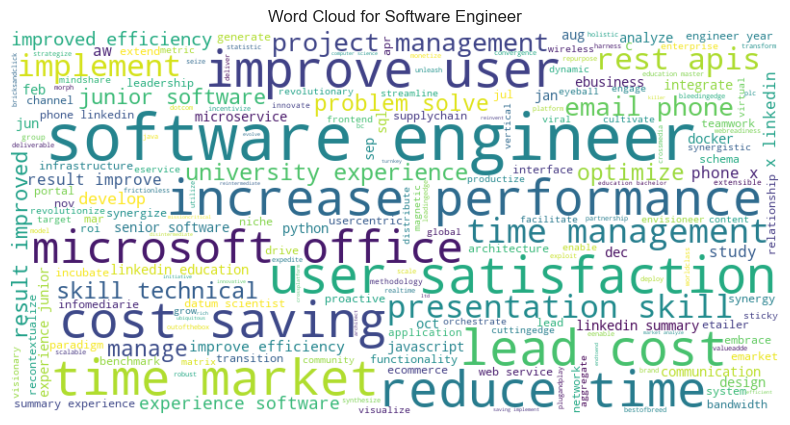

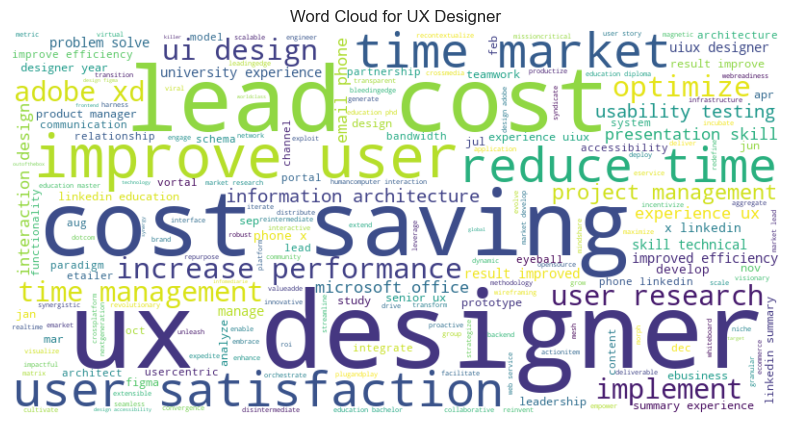

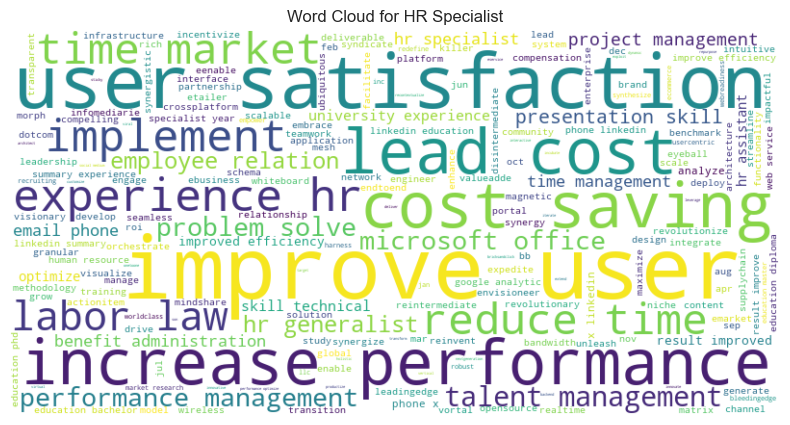

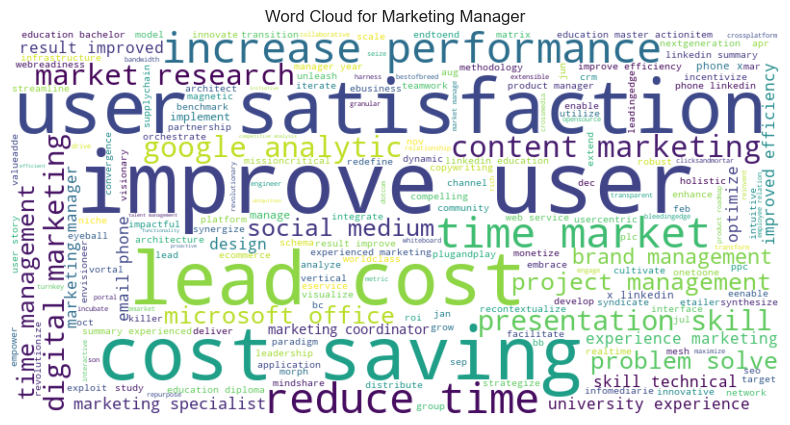

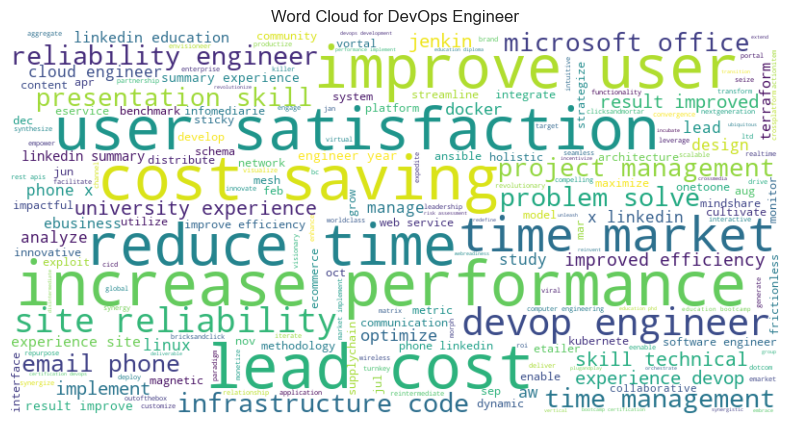

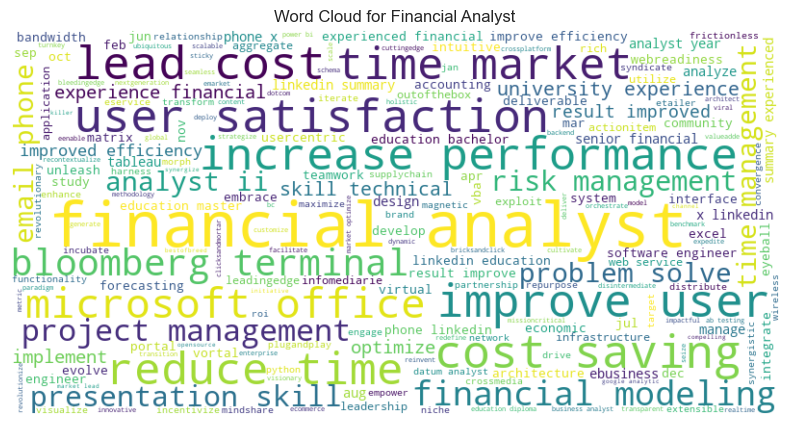

In [ ]:
df['processed_text'] = df['resume_text'].apply(preprocess_text)

categories = df['category'].unique()
for category in categories:
    text = ' '.join(df[df['category'] == category]['processed_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category}')
    plt.axis('off')
    plt.show()

In [9]:
# TF-IDF Vectorization

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['processed_text'])
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nFeature extraction completed. Shape:", X.shape)


Feature extraction completed. Shape: (2000, 5000)


**Classification Models and Evaluation**

In [10]:
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', probability=True),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}


Naive Bayes Results:
Accuracy: 0.9175
Classification Report:
                       precision    recall  f1-score   support

Cybersecurity Analyst       0.98      0.96      0.97        49
         Data Analyst       0.95      0.83      0.89        42
       Data Scientist       0.74      0.86      0.79        29
      DevOps Engineer       1.00      0.95      0.97        39
    Financial Analyst       0.92      0.96      0.94        49
        HR Specialist       0.90      0.97      0.94        37
    Marketing Manager       0.93      0.88      0.90        42
      Product Manager       0.95      0.98      0.97        43
    Software Engineer       0.85      0.80      0.82        35
          UX Designer       0.92      0.94      0.93        35

             accuracy                           0.92       400
            macro avg       0.91      0.91      0.91       400
         weighted avg       0.92      0.92      0.92       400



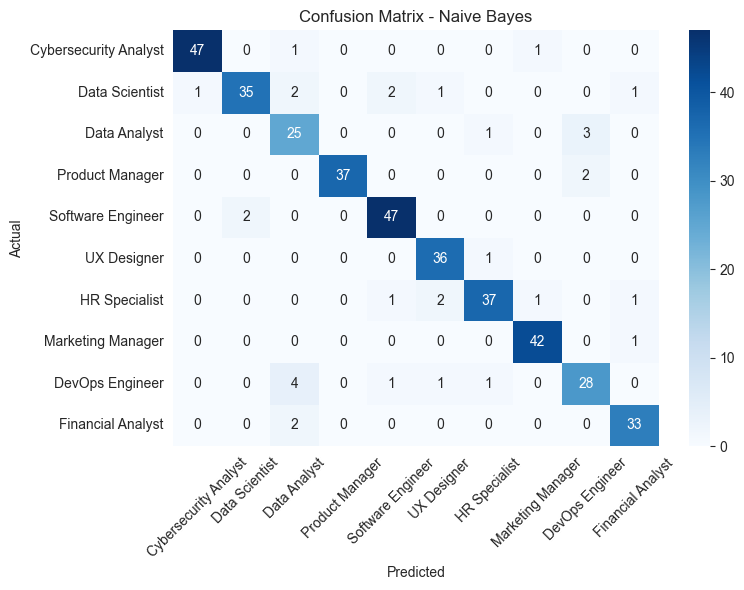


SVM Results:
Accuracy: 0.9175
Classification Report:
                       precision    recall  f1-score   support

Cybersecurity Analyst       0.98      0.96      0.97        49
         Data Analyst       0.95      0.83      0.89        42
       Data Scientist       0.74      0.86      0.79        29
      DevOps Engineer       1.00      0.95      0.97        39
    Financial Analyst       0.92      0.96      0.94        49
        HR Specialist       0.90      0.97      0.94        37
    Marketing Manager       0.93      0.88      0.90        42
      Product Manager       0.95      0.98      0.97        43
    Software Engineer       0.85      0.80      0.82        35
          UX Designer       0.92      0.94      0.93        35

             accuracy                           0.92       400
            macro avg       0.91      0.91      0.91       400
         weighted avg       0.92      0.92      0.92       400



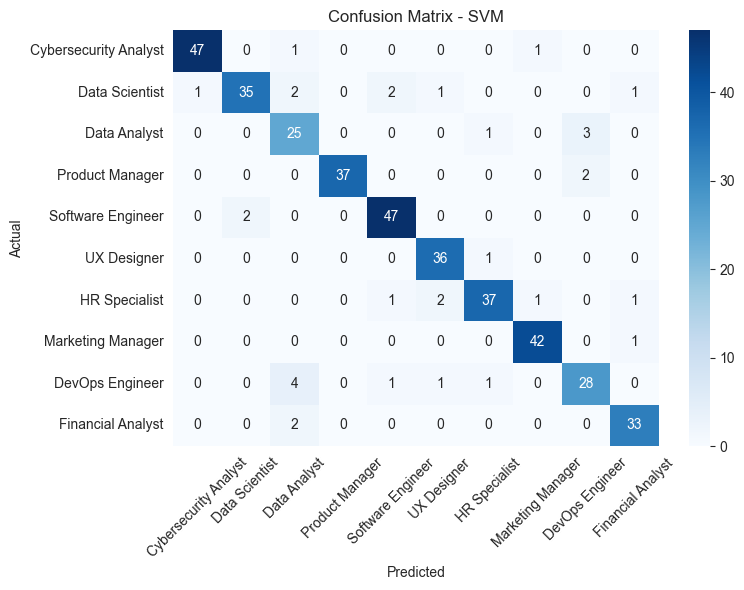


Logistic Regression Results:
Accuracy: 0.9175
Classification Report:
                       precision    recall  f1-score   support

Cybersecurity Analyst       0.98      0.96      0.97        49
         Data Analyst       0.95      0.83      0.89        42
       Data Scientist       0.74      0.86      0.79        29
      DevOps Engineer       1.00      0.95      0.97        39
    Financial Analyst       0.92      0.96      0.94        49
        HR Specialist       0.90      0.97      0.94        37
    Marketing Manager       0.93      0.88      0.90        42
      Product Manager       0.95      0.98      0.97        43
    Software Engineer       0.85      0.80      0.82        35
          UX Designer       0.92      0.94      0.93        35

             accuracy                           0.92       400
            macro avg       0.91      0.91      0.91       400
         weighted avg       0.92      0.92      0.92       400



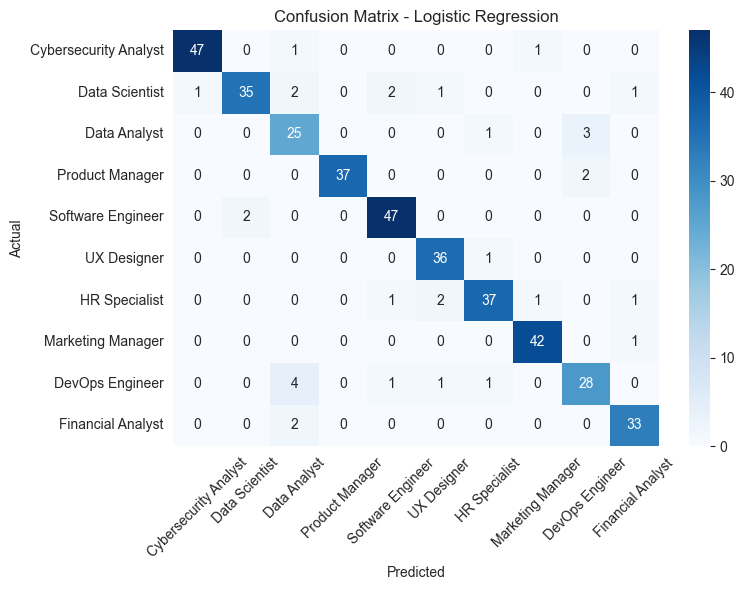

In [11]:
# Training and evaluation

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    print(f"\n{name} Results:")
    print("Accuracy:", results[name]['accuracy'])
    print("Classification Report:")
    print(results[name]['report'])
    
    # Confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', 
                cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

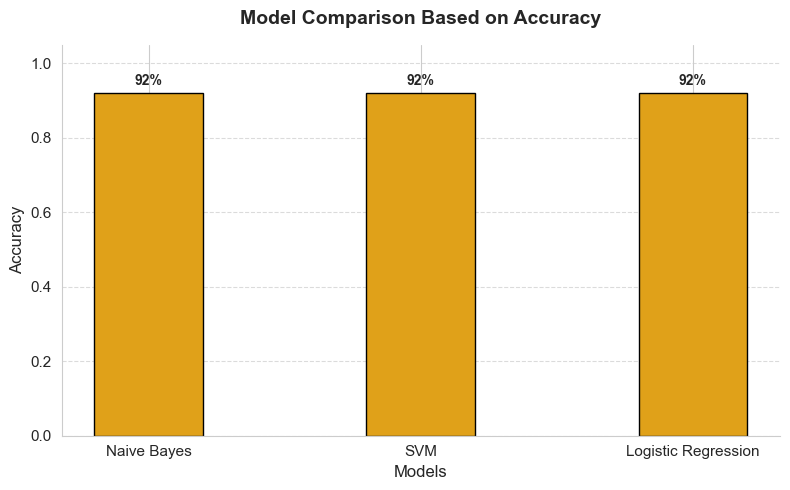

In [22]:
# Model Comparison

model_names = list(results.keys())

accuracies = [round(results[name]['accuracy'], 2) for name in results]

plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, width=0.4, edgecolor='black', color="#e0a119")

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height() + 0.015,
             f"{int(acc * 100)}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Model Comparison Based on Accuracy', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.show()

**BERT Embeddings + Logistic Regression**

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from tqdm import tqdm

# BERT Initialization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# BERT embeddings
def get_bert_embeddings(texts, batch_size=8):
    embeddings = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, padding=True, truncation=True, 
                          max_length=512, return_tensors="pt")
        
        with torch.no_grad():
            outputs = bert_model(**inputs)
        
        batch_embeddings = outputs.last_hidden_state.mean(dim=1).numpy()
        embeddings.extend(batch_embeddings)
    
    return np.array(embeddings)

X_bert = get_bert_embeddings(df['processed_text'].tolist())

X_train, X_test, y_train, y_test = train_test_split(
    X_bert, df['category'], test_size=0.2, random_state=42)

lr_bert = LogisticRegression(max_iter=1000)
lr_bert.fit(X_train, y_train)

y_pred = lr_bert.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"BERT Embeddings + Logistic Regression Accuracy: {accuracy:.2%}")

100%|██████████| 250/250 [07:24<00:00,  1.78s/it]


BERT Embeddings + Logistic Regression Accuracy: 90.00%


**Fine Tuned BERT**

In [ ]:
import torch
from transformers import BertForSequenceClassification, BertTokenizer, Trainer, TrainingArguments
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

le = LabelEncoder()
y_encoded = le.fit_transform(df['category'])

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def batch_tokenize(texts, batch_size=8):
    input_ids = []
    attention_masks = []
    max_length = 128  
    
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i+batch_size]
        encoded = tokenizer.batch_encode_plus(
            batch,
            max_length=max_length,
            padding='max_length', 
            truncation=True,
            return_tensors='pt'
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    
    return {
        'input_ids': torch.cat(input_ids),
        'attention_mask': torch.cat(attention_masks)
    }

inputs = batch_tokenize(df['processed_text'].tolist())

class ResumeDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    
    def __getitem__(self, idx):
        item = {
            'input_ids': self.encodings['input_ids'][idx],
            'attention_mask': self.encodings['attention_mask'][idx],
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }
        return item
    
    def __len__(self):
        return len(self.labels)

dataset = ResumeDataset(inputs, y_encoded)

train_size = int(0.8 * len(dataset))
train_dataset, val_dataset = torch.utils.data.random_split(
    dataset, [train_size, len(dataset) - train_size])

model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(le.classes_),
    torch_dtype=torch.float32  
)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=4,
    evaluation_strategy="epoch",  
    save_strategy="epoch",        
    logging_dir='./logs',
    logging_steps=50,
    load_best_model_at_end=True,
    gradient_accumulation_steps=4,
    fp16=False,
    no_cuda=True,  
    dataloader_pin_memory=False  
)

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=1)
    return {'accuracy': accuracy_score(labels, predictions)}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

print("Beginning training...")
try:
    trainer.train()
    eval_results = trainer.evaluate()
    print(f"\nFinal Validation Accuracy: {eval_results['eval_accuracy']:.2%}")
except KeyboardInterrupt:
    print("\nTraining interrupted by user")
except Exception as e:
    print(f"\nError during training: {str(e)}")

100%|██████████| 250/250 [00:06<00:00, 38.20it/s]
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
  0%|          | 0/600 [07:52<?, ?it/s]


Beginning training...


 12%|█▎        | 50/400 [02:56<21:00,  3.60s/it]

{'loss': 2.318, 'grad_norm': 3.862332582473755, 'learning_rate': 4.375e-05, 'epoch': 0.25}


 25%|██▌       | 100/400 [05:51<17:09,  3.43s/it]

{'loss': 1.9889, 'grad_norm': 12.40252685546875, 'learning_rate': 3.7500000000000003e-05, 'epoch': 0.5}


 38%|███▊      | 150/400 [08:45<15:09,  3.64s/it]

{'loss': 0.7817, 'grad_norm': 2.4995899200439453, 'learning_rate': 3.125e-05, 'epoch': 0.75}


 50%|█████     | 200/400 [11:39<11:22,  3.41s/it]

{'loss': 0.6244, 'grad_norm': 4.802402019500732, 'learning_rate': 2.5e-05, 'epoch': 1.0}


                                                 
 50%|█████     | 200/400 [12:17<11:22,  3.41s/it]

{'eval_loss': 0.5121926069259644, 'eval_accuracy': 0.91, 'eval_runtime': 38.2816, 'eval_samples_per_second': 10.449, 'eval_steps_per_second': 2.612, 'epoch': 1.0}


 62%|██████▎   | 250/400 [15:14<09:02,  3.61s/it]

{'loss': 0.5182, 'grad_norm': 7.782774925231934, 'learning_rate': 1.8750000000000002e-05, 'epoch': 1.25}


 75%|███████▌  | 300/400 [18:06<05:51,  3.51s/it]

{'loss': 0.5434, 'grad_norm': 0.8010527491569519, 'learning_rate': 1.25e-05, 'epoch': 1.5}


 88%|████████▊ | 350/400 [21:01<02:52,  3.45s/it]

{'loss': 0.4384, 'grad_norm': 0.42468327283859253, 'learning_rate': 6.25e-06, 'epoch': 1.75}


100%|██████████| 400/400 [23:52<00:00,  3.38s/it]

{'loss': 0.4562, 'grad_norm': 0.6597682237625122, 'learning_rate': 0.0, 'epoch': 2.0}


                                                 
100%|██████████| 400/400 [24:32<00:00,  3.38s/it]

{'eval_loss': 0.4892081022262573, 'eval_accuracy': 0.91, 'eval_runtime': 38.2488, 'eval_samples_per_second': 10.458, 'eval_steps_per_second': 2.614, 'epoch': 2.0}


100%|██████████| 400/400 [24:34<00:00,  3.69s/it]


{'train_runtime': 1474.2979, 'train_samples_per_second': 2.171, 'train_steps_per_second': 0.271, 'train_loss': 0.9586604166030884, 'epoch': 2.0}


100%|██████████| 100/100 [00:36<00:00,  2.73it/s]


Final Validation Accuracy: 91.00%


**Inferencing**

In [35]:
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X, y)  

joblib.dump(best_model, 'resume_classifier.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("Model and vectorizer saved successfully.")

Model and vectorizer saved successfully.
